# XARXES - OPCIONAL 1

A partir dels diferents tipus de codificació i modulació que hi ha a teoria, farem una cosa una mica més divertida...

El xifrat de Hill consisteix en un sistema de substitució poligràfica basat en àlgebra lineal, molt pràctic per operar sobre tres o més símbols simultàniament.
Cada lletra es substitueix per un nombre. La forma més senzilla és:


A=0,B=1,C=2,...Z=25


Per encriptar un missatge, cada bloc de n lletres (considerat com un vector) es multiplica per una matriu M,invertible, i de dimensió nxn (mòdul 26). Per desencriptar el missatge, cada bloc es multiplica per l'invers de la matriu. Aquestes matrius NO S'HAN DE CALCULAR. Es proporcionen en aquest exercici.
Les operacions que es fan operem en mòdul 26, això vol dir que només disposem dels números

Z26=(0,1,2,3,4,...,25)

Per tant el 26 equival al 0, 27 al 1 i així succesivament de forma cíclica.
Ajut: Per traduir un número major de 25 a un element del grup, el calculem fent el mòdul (%).
Exemple: 231 és més gran que 26 => 231 = 23 mod(26), calculat fent 231%26
Matriu d'encriptació:


M= [[6,24,1],[13,16,10],[20,17,15]]


Matriu per desencriptar:


M-1 = [[8,5,10],[21,8,21],[21,12,8]]


1.- Genereu una seqüència aleatòria caràcters de text.

2.- Crea la funció transforma_text(string) que tingui com a paràmetre d'entrada una cadena de caràcters o string i retorni una llista de números.  A partir de una cadena de text o string, utilitzeu la funció lower() per passar-ho tot a minúscules i convertiu les lletres en números. Si voleu encriptar text normal, deixeu a la mateixa posició aquells valors ('.', ',' ,':', ';'...) que no es poden codificar amb aquestes matrius.

Ajuda: Feu servir la següent llista per canviar cada lletra pel seu índex

llista_a = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p', 'q','r','s','t','u','v','w','x','y','z']

3.- Encripteu la seqüència

4.- Passeu els valors a binari (coficicació ASCII)

5.- Codifiqueu la seqüencia binaria encriptada fent servir els diferents models que es donen a teoria

6.- Moduleu la seqüència codificada

7.- Feu els procés invers per obtenir les dades originals. 

#### Matrices,listas y otros elementos importantes.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#Matriz para encriptar la secuencia
matrix = np.array([[6,24,1],[13,16,10],[20,17,15]]) 

#Matriz para desencriptar nuesta secuencia. M-1 mod 46
matrix_inv = np.array([[6,35,10],[7,6,17],[27,14,38]]) 

#lista de 46 caracteres
llista_a = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p', 'q','r',
            's','t','u','v','w','x','y','z',' ','.', ',' ,':', ';','@','#','$','"',
            '~','%','&','=','?','¿','!','¡','-','+','*'] 

#### Métodos de encriptación y desencriptación

In [66]:
"""
Transforma una cadena de texto por un número

@param: un string
@return: array de numeros
"""
def transforma_text(string):
    
    return list(map(lambda x: llista_a.index(x[0]) if x[0] in llista_a else x[0] ,string))
    
"""
Codifica el mensaje a partir de un array de numeros

@param: array de números
@return: array de números
"""

def encode(text):

    numbers = transforma_text(text)
    curr_array = numbers
    len_word = len(numbers)

    new_list = []

    if len_word%3 != 0:
        for x in range(0,3-len_word%3):
            curr_array.append(0)

    for i in range(0,len(curr_array),3):
        y = np.array(curr_array[i:i+3])
        new_list += list(matrix.dot(y))

    return list(map(lambda x: llista_a[x%46],new_list))

"""
Descodifica el mensaje a partir de un array de numeros

@param: array de números
@param: longitud del mensaje original
@return: -array de números
"""
def decode(array,len_msg):
    
    code = bin_to_ascii(array)
    
    numbers = transforma_text(code)#Transformamos el texto a números
    
    curr_array = numbers

    new_list = []

    for i in range(0,len(curr_array),3):
        y = np.array(curr_array[i:i+3])
        new_list += list(matrix_inv.dot(y))


    return list(map(lambda x: llista_a[x%46],new_list))[:len_msg]

"""
Descodifica el mensaje a partir de un array de numeros

@param: array de números
@param: longitud del mensaje original
@return: -array de números
"""
def ascii_to_bin(array):
    return ''.join(list(map(lambda x: bin(ord(x))[2:].zfill(8), array)))



#### MODULACIÓN

In [67]:
"""
Descodifica el mensaje a partir de un array de numeros

@param: array de números
@param: longitud del mensaje original
@return: -array de números
"""
def ascii_to_bin(array):
    return ''.join(list(map(lambda x: bin(ord(x))[2:].zfill(8), array)))


"""
Codificación NRZ-L de la señal
@param: señal de entrada
@return: señal modulada
"""
def encode_nrzl(entry):
    
    
    entry=[int(i) for i in entry]
    signal = [1 if i==0 else -1 for i in entry]
    return signal

"""
Codificación NRZ-I de la señal
@param: señal de entrada
@return: señal modulada
"""
def encode_nrzi(entry):
    
    
    entry=[int(i) for i in entry]
    
    bit = -1 if(entry[0] == 0) else 1
    
    signal = [bit]
    entry.pop(0)
    for i in entry:
        if(i==1):
            bit = bit*-1
        signal.append(bit)
    return signal

"""
Codificación Bipolar-AMI de la señal
@param: señal de entrada
@return: señal modulada
"""

def encode_biAMI(entry):
    
    entry=[int(i) for i in entry]
    
    signal = list()
    ones = 0
    for i in entry:
        if i == 0:
            signal.append(i)
        else:
            ones += 1
            if ones%2 == 1: 
                signal.append(1)
            else:
                signal.append(-1)
        
    return signal

"""
Codificación Pseudoternaria de la señal
@param: señal de entrada
@return: señal modulada
"""

def encode_pseudoternary(entry):
    
    entry=[int(i) for i in entry]
    
    signal = list()
    ones = 0
    for i in entry:
        if i == 1:
            signal.append(0)
        else:
            ones += 1
            if ones%2 == 1: 
                signal.append(1)
            else:
                signal.append(-1)
        
    return signal

"""
Codificación Manchester de la señal
@param: señal de entrada
@return: señal modulada
"""
def encode_manchester(entry):
    
    entry=[int(i) for i in entry]
    
    signal = []
    for i in entry:
        if i == 0:
            signal.append(1)
            signal.append(-1)
        else:
            signal.append(-1)
            signal.append(1)
            
    return signal

"""
Codificación Manchester Diferencial de la señal
@param: señal de entrada
@return: señal modulada
"""

def encode_manchester_diff(entry):
    
    entry=[int(i) for i in entry]
    
    signal = []
    
    if entry[0]==0:
        signal.append(-1)
        signal.append(1)
    else:
        signal.append(1)
        signal.append(-1)
    
    for i in range(1,len(entry)):
        last = signal[len(signal)-2:len(signal)]
        if entry[i] == 0:      
            signal.append(last[0])
            signal.append(last[1])
        else:
            signal.append(last[1])
            signal.append(last[0])
            
    return signal

"""
Codificación B8ZS de la señal
@param: señal de entrada
@return: señal modulada
"""
def encode_b8zs(entry):
    
    entry = encode_biAMI(entry)
    signal = []
    
    aux = 0
    i = 0
    ones = 0
    
    while i != len(entry):
        
        if entry[i]==0:
            if i+8 <= len(entry):
                if not 1 in entry[i:i+8] and not -1 in entry[i:i+8]:
                    if signal[i-1]==1:
                        for x in [0,0,0,1,-1,0,-1,1]:
                            signal.append(x)
                    else:
                        for x in [0,0,0,-1,1,0,1,-1]:
                            signal.append(x)
                    i+=8
                    
            signal.append(entry[i])
            i+=1
        else:
            signal.append(entry[i])
            i+=1
            
    return signal
"""
Codificación HDB3 de la señal
@param: señal de entrada
@return: señal modulada
"""
def encode_hdb3(entry):
    
    entry= encode_biAMI(entry)
    signal = entry[:]
    
    i = 0
    aux = 0
    ones = 0
    
    while i != len(entry):
        
        if signal[i] != 0:
            ones += 1
            aux = signal[i]
            i += 1
            
        else:
            if i+4 < len(signal):
                if not 1 in signal[i:i+4] and not -1 in signal[i:i+4]:
                    if ones%2!=0: #is even
                        #ADD B00V
                        signal[i]= aux * -1
                        signal[i+3]= signal[i]
                        signal[i+4:len(signal)] = [-1*x for x in signal[i+4:len(signal)]]
                        
                        aux*=-1
                        ones+=1
                    else:
                        #ADD 000V
                        signal[i+3] = aux
            i+=1
           
    return signal

##### OBTENCIÓN DE LA SECUENCIA ORIGINAL

In [68]:
"""
Pasa de binario a ascii

@param: array de números
@return: array de caracteres
"""
def bin_to_ascii(array):
    
    code = ''.join(str(x) for x in array)
    
    return [chr(int(code[i:i+8],2)) for i in range(0,len(array),8)]
        


"""
Recuperación de la señal codificada por NRZ-I
@param: señal de entrada
@return: señal modulada
"""
def decode_nrzl(entry):
    return [1 if i==-1 else 0 for i in entry]

"""
Recuperación de la señal codificada por NRZ-I
@param: señal de entrada
@return: señal modulada
"""
def decode_nrzi(entry):
    
    bit = 0 if(entry[0] == -1) else 1
    signal = [bit]
    for i in range(1,len(entry)):
        if entry[i]==entry[i-1]:
            signal.append(0)
        else:
            signal.append(1)
            
    return signal

"""
Recuperación de la señal codificada por binomial-AMI
@param: señal de entrada
@return: señal modulada
"""
def decode_biAMI(entry):
    
    return [abs(i) for i in entry]

"""
Recuperación de la señal codificada por binomial-AMI
@param: señal de entrada
@return: señal modulada
"""
def decode_pseudoternary(entry):
    
    return [0 if abs(i)==1 else 1 for i in entry]

"""
Recuperación de la señal codificada por Manchester
@param: señal de entrada
@return: señal modulada
"""
def decode_manchester(entry):
    
    decode=[]
    
    for i in range(0,len(entry)-1,2):
        if entry[i:i+2]==[1,-1]:
            decode.append(0)
        else:
            decode.append(1)
          
    return decode
"""
Recuperación de la señal codificada por Manchester Diferencial
@param: señal de entrada
@return: señal modulada
"""
def decode_manchester_diff(entry):
    
    decode=[]
    
    if entry[0:2]==[1,-1]:
        decode.append(1)
    else:
        decode.append(0)
        
    last = entry[0:2]
    
    for i in range(2,len(entry)-1,2):
        
        if entry[i:i+1] == last:
            decode.append(0)
        else:
            decode.append(1)
        last = entry[i:i+1]
    
    return decode

"""
Recuperación de la señal codificada por B8ZS
@param: señal de entrada
@return: señal modulada
"""
def decode_b8zs(entry):

    positive = [0,0,0,1,-1,0,-1,1]
    negative = [0,0,0,-1,1,0,1,-1]
    
    i = 0
    decode = []
    while i < len(entry):
        if entry[i]==0:
            if i+8 <= len(entry):
                octet = entry[i:i+8]
                if (entry[i-1]==-1 and octet==negative) or (entry[i-1]==1 and octet==positive):
                    decode += [0,0,0,0,0,0,0,0]
                    i+=8
                else:
                    decode.append(0)
                    i+=1
                continue
            i+=1
            decode.append(0)
        else:
            decode.append(1)
            i+=1
    return decode
                    

"""
Recuperación de la señal codificada por HDB3
@param: señal de entrada
@return: señal modulada
"""
def decode_hdb3(entry):
    
    decode = entry[:]
    aux = 0
    i = 0
    
    while i < len(entry):
        
        if entry[i] != 0:
            if aux == entry[i]:
                decode[i-3:i+1]=[0,0,0,0]
            aux=entry[i]
        i+=1
          
    return [abs(x) for x in decode]

#### main

In [69]:
if __name__== "__main__" :
    
    msg = "hello world"

    text = str.lower(msg)  #Our string. We will encode it.
    print("Nuestro mensaje es: {}\n".format(text))

    #Codificación
    
    encode_text = ''.join(encode(text))
    print("El mensaje cifrado es {}\n".format(encode_text))
    
    binari = ascii_to_bin(encode_text)
    print("Pasamos nuestra mensaje secreto a binario:\n{}".format(binari))
    
    msg_signal = np.array([int(i)for i in binari])

Nuestro mensaje es: hello world

El mensaje cifrado es l~fo:uz%nah!

Pasamos nuestra mensaje secreto a binario:
011011000111111001100110011011110011101001110101011110100010010101101110011000010110100000100001


#### Prueba de codificación y recuperación de la señal

In [70]:
%matplotlib inline

### Non Return Zero - Level

011011000111111001100110011011110011101001110101011110100010010101101110011000010110100000100001


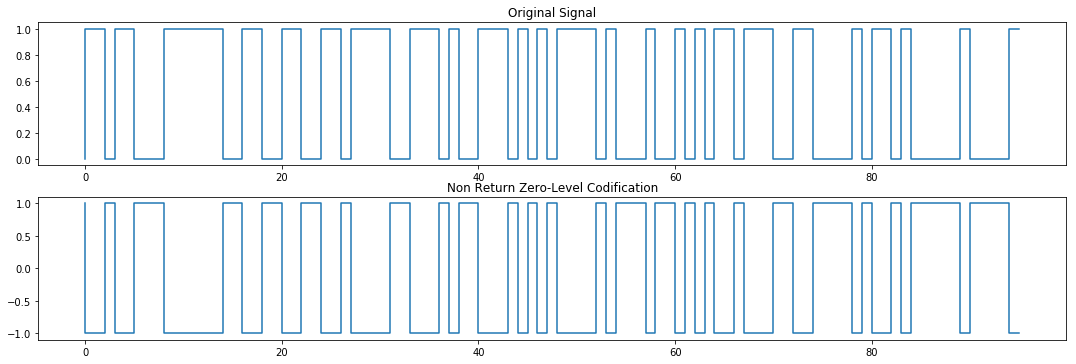

In [71]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
fig.tight_layout()
y = np.array([i for i in range(0,len(msg_signal))])

ax1.set_title('Original Signal')
ax1.step(y,msg_signal)

print(binari)

nrzl_encode = encode_nrzl(binari)

ax2.set_title('Non Return Zero-Level Codification')
ax2.step(y,nrzl_encode)

In [72]:
#decodification of our signal
nrzl_decode = decode_nrzl(nrzl_encode)

#decodification of the message
final_msg = decode(nrzl_decode,len(msg))
print("mensaje recibido: {}".format(''.join(final_msg)))


mensaje recibido: hello world


### Non Return Zero - Inverted

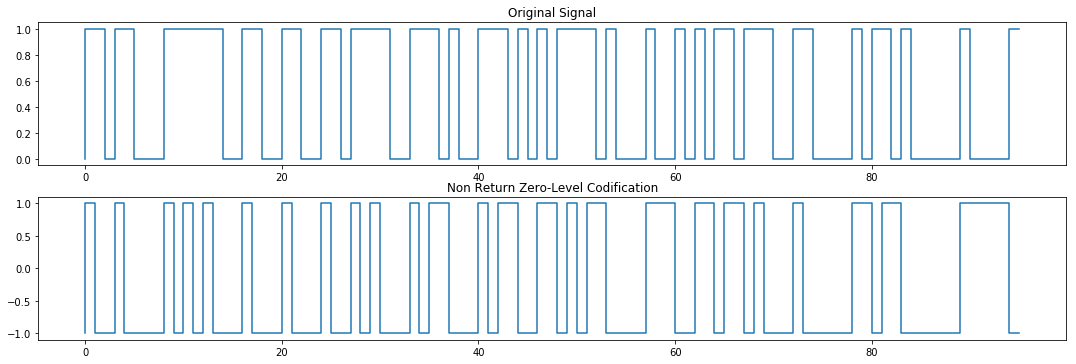

In [73]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
fig.tight_layout()
y = np.array([i for i in range(0,len(msg_signal))])

ax1.set_title('Original Signal')
ax1.step(y,msg_signal)

nrzi_encode = encode_nrzi(binari)
ax2.set_title('Non Return Zero-Level Codification')
ax2.step(y,nrzi_encode)

In [74]:
#decodification of our signal
nrzi_decode = decode_nrzi(nrzi_encode)

#decodification of the message
final_msg = decode(nrzi_decode,len(msg))
print("mensaje recibido: {}".format(''.join(final_msg)))

mensaje recibido: hello world


### Bipolar-AMI

011011000111111001100110011011110011101001110101011110100010010101101110011000010110100000100001


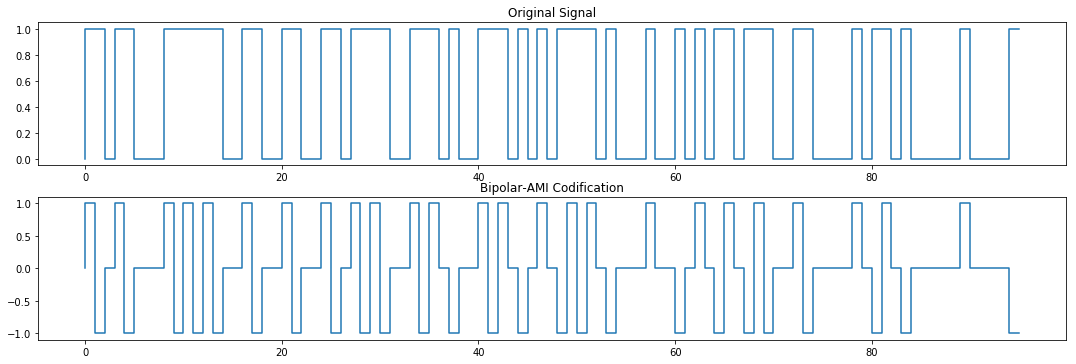

In [75]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
fig.tight_layout()
y = np.array([i for i in range(0,len(msg_signal))])

ax1.set_title('Original Signal')
ax1.step(y,msg_signal)

biAMI_encode = encode_biAMI(binari)
print(binari)
ax2.set_title('Bipolar-AMI Codification')
ax2.step(y,biAMI_encode)

In [76]:
#decodification of our signal
biAMI_decode =decode_biAMI(biAMI_encode)

#decodification of the message
final_msg = decode(biAMI_decode,len(msg))
print("mensaje recibido: {}".format(''.join(final_msg)))

mensaje recibido: hello world


### Pseudoternary

011011000111111001100110011011110011101001110101011110100010010101101110011000010110100000100001


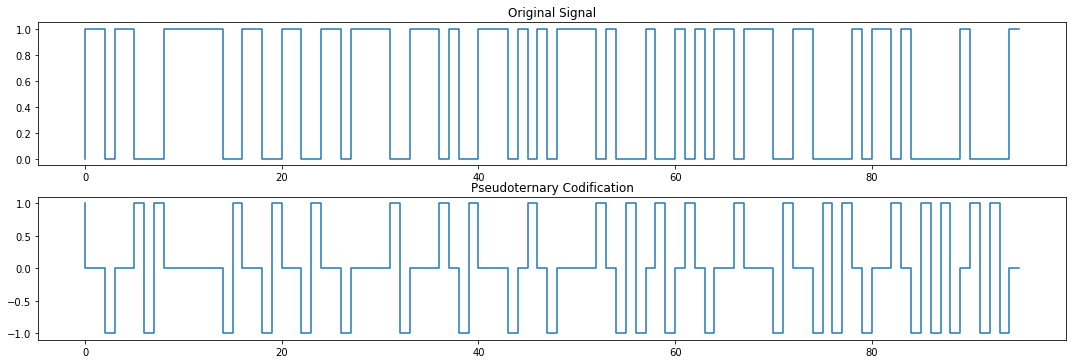

In [77]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
fig.tight_layout()
y = np.array([i for i in range(0,len(msg_signal))])

ax1.set_title('Original Signal')
ax1.step(y,msg_signal)

pseudoternary_encode = encode_pseudoternary(binari)
print(binari)
ax2.set_title('Pseudoternary Codification')
ax2.step(y,pseudoternary_encode)

In [78]:
#decodification of our signal
pseudoternary_decode =decode_pseudoternary(pseudoternary_encode)

#decodification of the message
final_msg = decode(pseudoternary_decode,len(msg))
print("mensaje recibido: {}".format(''.join(final_msg)))

mensaje recibido: hello world


### Manchester

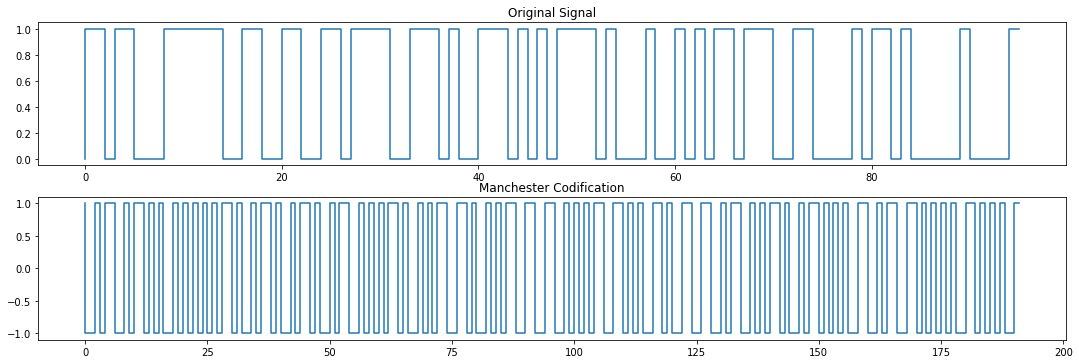

In [79]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
fig.tight_layout()
y = np.array([i for i in range(0,len(msg_signal))])

ax1.set_title('Original Signal')
ax1.step(y,msg_signal)

manchester_encode = encode_manchester(binari)
y = np.array([i for i in range(0,len(manchester_encode))])
ax2.set_title('Manchester Codification')
ax2.step(y,manchester_encode)

In [80]:
#decodification of our signal
manchester_decode =decode_manchester(manchester_encode)

#decodification of the message
final_msg = decode(manchester_decode,len(msg))
print("mensaje recibido: {}".format(''.join(final_msg)))

mensaje recibido: hello world


### Manchester Differencial

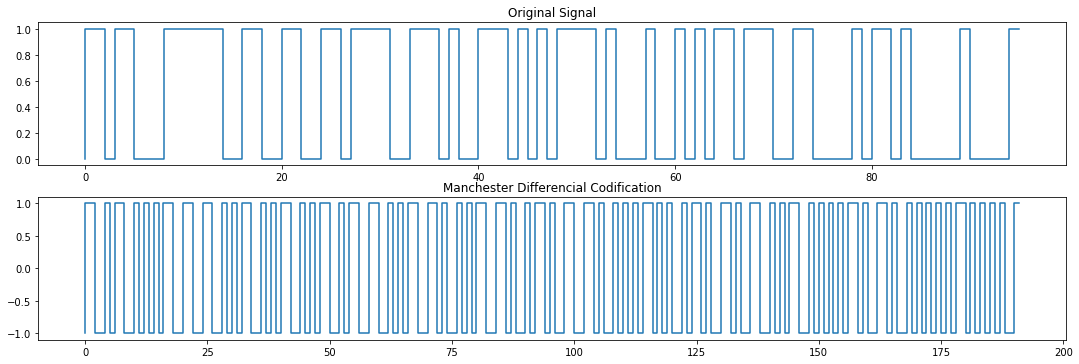

In [81]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
fig.tight_layout()
y = np.array([i for i in range(0,len(msg_signal))])

ax1.set_title('Original Signal')
ax1.step(y,msg_signal)

manchester_diff_encode = encode_manchester_diff(binari)
y = np.array([i for i in range(0,len(manchester_diff_encode))])
ax2.set_title('Manchester Differencial Codification')
ax2.step(y,manchester_diff_encode)

In [82]:
#decodification of our signal
manchester_diff_decode =decode_manchester_diff(manchester_diff_encode)

#decodification of the message
final_msg = decode(manchester_diff_decode,len(msg))
print("mensaje recibido: {}".format(''.join(final_msg)))

mensaje recibido: hello world


### B8ZS

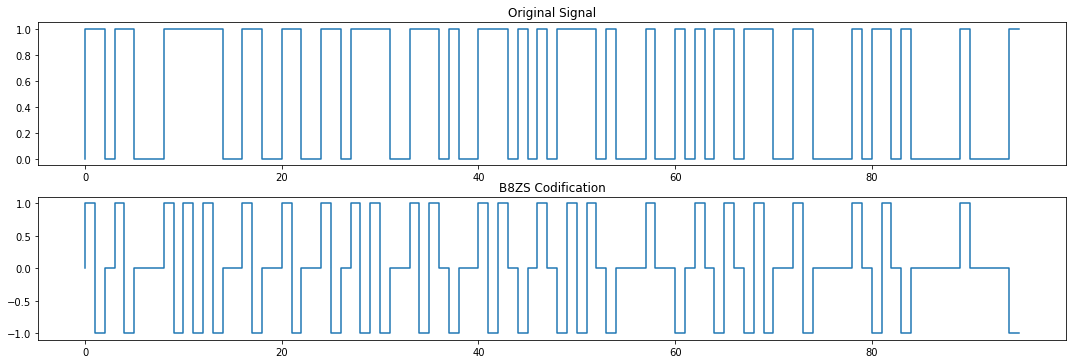

In [83]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
fig.tight_layout()
y = np.array([i for i in range(0,len(msg_signal))])

ax1.set_title('Original Signal')
ax1.step(y,msg_signal)

b8zs_encode = encode_b8zs(binari)
ax2.set_title('B8ZS Codification')
ax2.step(y,b8zs_encode)

In [84]:
#decodification of our signal
b8zs_decode =decode_b8zs(b8zs_encode)

#decodification of the message
final_msg = decode(b8zs_decode,len(msg))
print("mensaje recibido: {}".format(''.join(final_msg)))

mensaje recibido: hello world


### HDB3

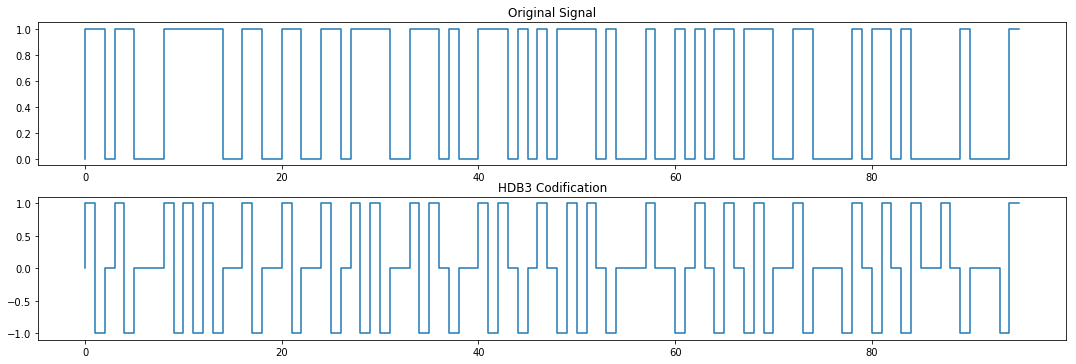

In [85]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
fig.tight_layout()
y = np.array([i for i in range(0,len(msg_signal))])

ax1.set_title('Original Signal')
ax1.step(y,msg_signal)

hdb3_encode = encode_hdb3(binari)
ax2.set_title('HDB3 Codification')
ax2.step(y,hdb3_encode)

In [58]:
#decodification of our signal
hdb3_decode =decode_hdb3(hdb3_encode)

#decodification of the message
final_msg = decode(hdb3_decode,len(msg))
print("mensaje recibido: {}".format(''.join(final_msg)))

mensaje recibido: hello world
